In [71]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols as ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## ejercicio 1 ANOVA DE UNA VIA

In [29]:
df = pd.read_excel("datasets/datosbaseball.xlsx")
df.head()

,posicion,bateo
0,OF,0.359
1,IF,0.340
2,IF,0.330
3,OF,0.341
4,IF,0.366


In [30]:
model = ols("bateo~posicion", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,4.059147,1.0,3213.613404,6.411760e-170
posicion,0.007557,3.0,1.994349,1.146928e-01
Residual,0.407984,323.0,NaN,NaN


In [31]:
"""rechazamos"""

'rechazamos'

## ejercicio 2 - ANOBA POR BLOQUES

In [32]:
df2 = pd.read_excel("datasets/datostienda.xlsx")
df2.head()

,producto,tienda,precio
0,lettuce,A,1.755
1,potatoes,A,2.655
2,milk,A,2.235
3,eggs,A,0.975
4,bread,A,2.370


In [33]:
model2 = ols("precio ~ tienda + producto", data=df2).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
tienda,5.737207,3.0,13.025212,1.897557e-05
producto,139.479418,9.0,105.553625,1.102247e-18
Residual,3.964224,27.0,NaN,NaN


In [34]:
"""rechazamos"""

'rechazamos'

## ejercicio 3 - ANOBA DE DOS VIAS

In [46]:
df3 = pd.read_excel("datasets/datosconstruc.xlsx")
df3.head()

,templado,grosor,resistencia
0,rapido,8,15.29
1,rapido,8,15.89
2,rapido,8,16.02
3,rapido,8,16.56
4,rapido,8,15.46


In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   templado     30 non-null     object 
 1   grosor       30 non-null     int64  
 2   resistencia  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [57]:
df3["grosor"] = pd.Categorical(df3["grosor"])

In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   templado     30 non-null     object  
 1   grosor       30 non-null     category
 2   resistencia  30 non-null     float64 
dtypes: category(1), float64(1), object(1)
memory usage: 770.0+ bytes


In [59]:
model3 = ols("resistencia ~ templado*grosor", data=df3).fit()
anova_table = sm.stats.anova_lm(model3, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
templado,112.675320,1.0,380.082037,3.194915e-16
grosor,10.413167,2.0,17.563108,2.000663e-05
templado:grosor,1.603500,2.0,2.704503,8.725105e-02
Residual,7.114800,24.0,NaN,NaN


## ejercicio 4 - COMBO

In [63]:
df4 = pd.read_csv("datasets/house_prices.csv")
df4.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


factor = MSZoning

variable de medicion = SalePrice

#### ¿La clasificación de la zona (MSZoning) tiene efecto sobre el precio de venta? --> ANOBA DE 1 VIA

In [72]:
model4 = ols("SalePrice~MSZoning", data=df4).fit()
anova_table = sm.stats.anova_lm(model4, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,5.554423e+10,1.0,9.834711,1.746774e-03
MSZoning,9.904000e+11,4.0,43.840282,8.817634e-35
Residual,8.217511e+12,1455.0,NaN,NaN


In [73]:
"""RECHAZAMOS"""

'RECHAZAMOS'

####  ¿Cuál es la zona con el precio media de venta más alto?¿Y el más bajo? --> POSTHOC TEST

In [77]:
α = 0.05

In [81]:
tukey = pairwise_tukeyhsd(endog=df4["SalePrice"], groups=df4["MSZoning"], alpha=α)

In [120]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
C (all),FV,139486.0615,0.0,69764.6598,209207.4633,True
C (all),RH,57030.375,0.3272,-25710.258,139771.008,False
C (all),RL,116476.9948,0.0,51288.5523,181665.4372,True
C (all),RM,51788.8303,0.2075,-14590.2657,118167.9262,False
FV,RH,-82455.6865,0.0008,-139737.6632,-25173.7098,True
FV,RL,-23009.0668,0.1154,-49176.7096,3158.5761,False
FV,RM,-87697.2313,-0.0,-116704.0733,-58690.3893,True
RH,RL,59446.6198,0.0147,7777.6346,111115.6049,True
RH,RM,-5241.5447,0.9988,-58404.8345,47921.745,False
RL,RM,-64688.1645,-0.0,-79849.1688,-49527.1602,True


In [142]:
test = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])
test

,group1,group2,meandiff,p-adj,lower,upper,reject
0,C (all),FV,139486.0615,0.0000,69764.6598,209207.4633,True
1,C (all),RH,57030.3750,0.3272,-25710.2580,139771.0080,False
2,C (all),RL,116476.9948,0.0000,51288.5523,181665.4372,True
3,C (all),RM,51788.8303,0.2075,-14590.2657,118167.9262,False
4,FV,RH,-82455.6865,0.0008,-139737.6632,-25173.7098,True
5,FV,RL,-23009.0668,0.1154,-49176.7096,3158.5761,False
6,FV,RM,-87697.2313,-0.0000,-116704.0733,-58690.3893,True
7,RH,RL,59446.6198,0.0147,7777.6346,111115.6049,True
8,RH,RM,-5241.5447,0.9988,-58404.8345,47921.7450,False
9,RL,RM,-64688.1645,-0.0000,-79849.1688,-49527.1602,True


In [85]:
import matplotlib.pyplot as plt

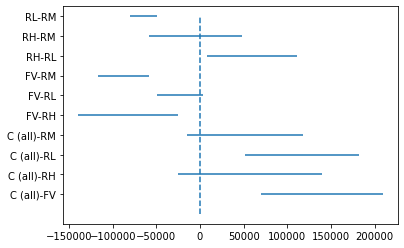

In [89]:
rows = tukey.summary().data[1:]
plt.hlines( range(len(rows)), [row[4] for row in rows], [row[5] for row in rows] )
plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
plt.gca().set_yticks( range( len( rows ) ) )
plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
plt.show()

<AxesSubplot:xlabel='group1'>

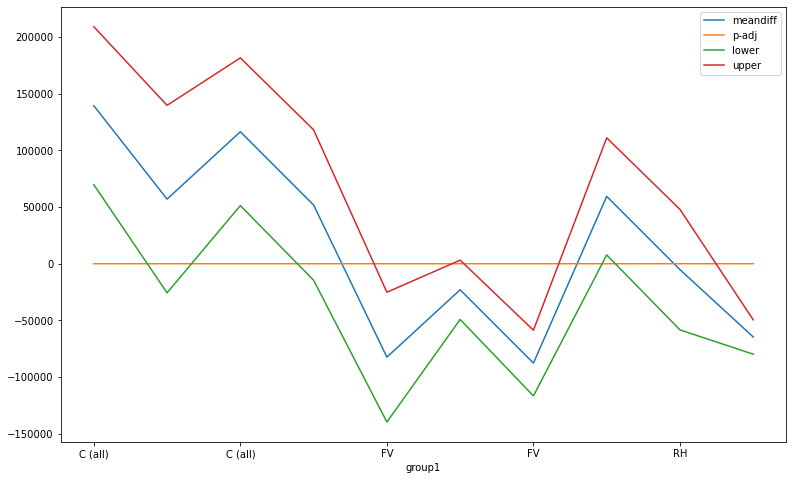

In [151]:
test.plot.line(x='group1', figsize=(13,8))